In [22]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

The following are plots to compare models trained on the simplest task

In [23]:
# indexed by lmax, and for lmax=1, also whether the model is larger or smaller

task_str = 'simple_task_fixed_symmetries'

MODEL_ID_TO_TEMPLATE = {
    '1': 'runs/%s/{}-zernike-simple_task_100pdbbs-ks=12-lmax=1-rst_norm=square' % (task_str),
    # '1-large': 'runs/simple_task/{}-zernike-simple_task_100pdbbs-large-ks=12-lmax=1-rst_norm=square',
    '2': 'runs/%s/{}-zernike-simple_task_100pdbbs-ks=12-lmax=2-rst_norm=square' % (task_str),
    '3': 'runs/%s/{}-zernike-simple_task_100pdbbs-ks=12-lmax=3-rst_norm=square' % (task_str),
    '4': 'runs/%s/{}-zernike-simple_task_100pdbbs-ks=12-lmax=4-rst_norm=square' % (task_str),
    '5': 'runs/%s/{}-zernike-simple_task_100pdbbs-ks=12-lmax=5-rst_norm=square' % (task_str),
    # '6': 'runs/simple_task/{}-zernike-simple_task_100pdbbs-ks=12-lmax=6-rst_norm=square',
    # '7': 'runs/simple_task/{}-zernike-simple_task_100pdbbs-ks=12-lmax=7-rst_norm=square',
}
MODEL_ID_TO_COLOR = {
    '1': 'tab:blue',
    # '1-large': 'tab:orange',
    '2': 'tab:orange',
    '3': 'tab:green',
    '4': 'tab:red',
    '5': 'tab:purple',
    # '6': 'tab:pink',
    # '7': 'tab:gray',
}
MODEL_ID_TO_PRETTY_NAME = {
    '1': r'$\ell_{\mathrm{max}}=1$',
    '2': r'$\ell_{\mathrm{max}}=2$',
    '3': r'$\ell_{\mathrm{max}}=3$',
    '4': r'$\ell_{\mathrm{max}}=4$',
    '5': r'$\ell_{\mathrm{max}}=5$',
}

MODEL_IDS = list(MODEL_ID_TO_TEMPLATE.keys()) # banking on the ordered-dict

MODEL_TYPE_TO_NAME = {
    'angles': 'so3_convnet_angles',
    'sin-cos': 'so3_convnet_sin_cos',
    'norms': 'so3_convnet_vec',
}
MODEL_TYPE_TO_PRETTY_NAME = {
    'angles': r'$\chi$ Angles',
    'sin-cos': r'Sin-Cos of $\chi$ Angles',
    'norms': 'Plane Norms',
}
MODEL_TYPE_TO_COLOR = {
    'angles': 'crimson',
    'sin-cos': 'blue',
    'norms': 'purple'
}
MODEL_TYPES = list(MODEL_TYPE_TO_NAME.keys()) # banking on the ordered-dict

def get_model_dir(model_type, model_id):
    return MODEL_ID_TO_TEMPLATE[model_id].format(MODEL_TYPE_TO_NAME[model_type])

/tmp/ipykernel_2702838/1990974329.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


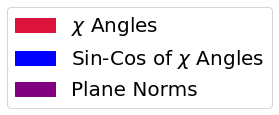

/tmp/ipykernel_2702838/1990974329.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


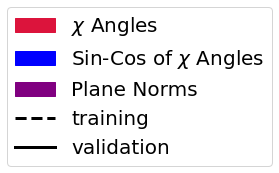

/tmp/ipykernel_2702838/1990974329.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


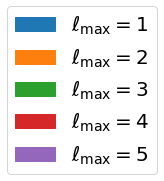

In [24]:
# make legends

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

model_type_legend_elements = [Patch(facecolor=MODEL_TYPE_TO_COLOR[model_type], edgecolor=MODEL_TYPE_TO_COLOR[model_type], label=MODEL_TYPE_TO_PRETTY_NAME[model_type])
                              for model_type in MODEL_TYPES]

fig, ax = plt.subplots(figsize=(1, 1))
ax.legend(handles=model_type_legend_elements, loc='center', fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.savefig('plots/model_type_legend.png', bbox_inches='tight')
plt.savefig('plots/model_type_legend.pdf', bbox_inches='tight')
plt.show()

model_type_plus_split_legend_elements = [Patch(facecolor=MODEL_TYPE_TO_COLOR[model_type], edgecolor=MODEL_TYPE_TO_COLOR[model_type], label=MODEL_TYPE_TO_PRETTY_NAME[model_type])
                                        for model_type in MODEL_TYPES] + \
                                        [Line2D([0], [0], color='black', ls='--', lw=3, label='training'),
                                         Line2D([0], [0], color='black', ls='-', lw=3, label='validation')]

fig, ax = plt.subplots(figsize=(1, 1))
ax.legend(handles=model_type_plus_split_legend_elements, loc='center', fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.savefig('plots/model_type_plus_split_legend.png', bbox_inches='tight')
plt.savefig('plots/model_type_plus_split_legend.pdf', bbox_inches='tight')
plt.show()

model_id_legend_elements = [Patch(facecolor=MODEL_ID_TO_COLOR[model_id], edgecolor=MODEL_ID_TO_COLOR[model_id], label=MODEL_ID_TO_PRETTY_NAME[model_id])
                              for model_id in MODEL_IDS]

fig, ax = plt.subplots(figsize=(1, 1))
ax.legend(handles=model_id_legend_elements, loc='center', fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.savefig('plots/lmax_legend.png', bbox_inches='tight')
plt.savefig('plots/lmax_legend.pdf', bbox_inches='tight')
plt.show()

In [25]:
def get_loss_traces(model_dir):
    train_loss_trace = np.load(os.path.join(model_dir, 'loss_traces', 'train_loss_trace.npy'))
    valid_loss_trace = np.load(os.path.join(model_dir, 'loss_traces', 'valid_loss_trace.npy'))
    return train_loss_trace, valid_loss_trace

def get_best_chi_angle_metrics(model_dir):
    with open(os.path.join(model_dir, 'summary_results_dict.json'), 'r') as f:
        summary_results_dict = json.load(f)
    
    valid_mae = summary_results_dict['valid']['mae_per_angle_4']
    valid_acc = summary_results_dict['valid']['accuracy_per_angle_4']
    test_mae = summary_results_dict['test']['mae_per_angle_4']
    test_acc = summary_results_dict['test']['accuracy_per_angle_4']
    
    return valid_mae, valid_acc, test_mae, test_acc

def get_chi_angles_traces(model_dir):
    START_OF_MAE_PER_CHI = 9
    train_mae_traces = [[], [], [], []]
    valid_mae_traces = [[], [], [], []]
    with open(os.path.join(model_dir, 'log.txt'), 'r') as f:
        for line in f:
            if line == '\n' or line.startswith('Epoch'):
                continue
            
            split_line = line.split('\t')
            for i in range(4):
                train_mae, valid_mae = list(map(int, split_line[START_OF_MAE_PER_CHI + i].split('-')))
                train_mae_traces[i].append(train_mae)
                valid_mae_traces[i].append(valid_mae)
    
    return train_mae_traces, valid_mae_traces
            

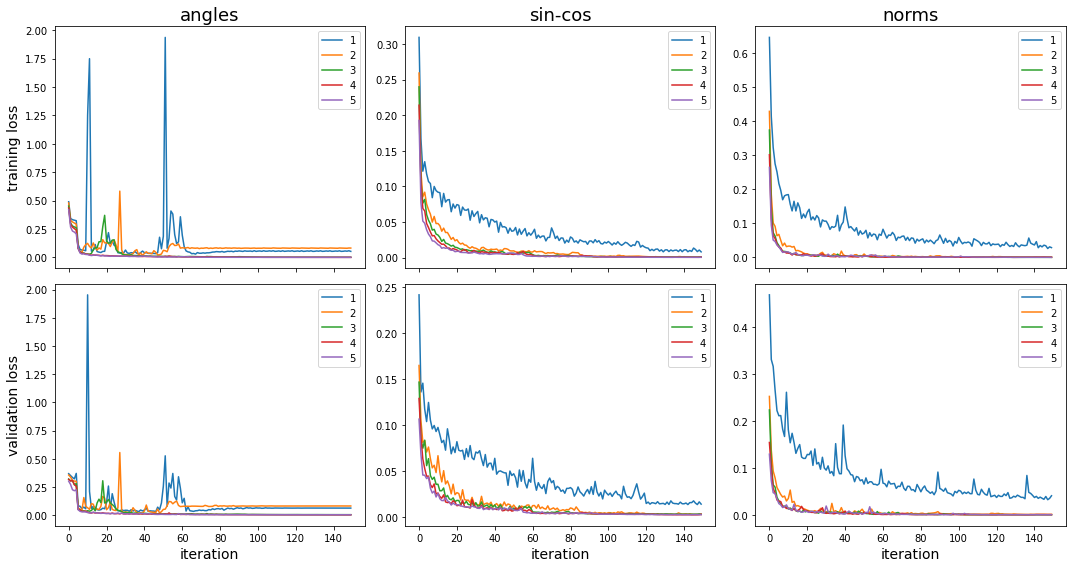

In [26]:
# plot loss traces

ncols = 3
nrows = 2
colsize = 5
rowsize = 4
fig, axs = plt.subplots(figsize=(ncols*colsize, nrows*rowsize), ncols=ncols, nrows=nrows, sharex=True, sharey=False)

for i_col, model_type in enumerate(MODEL_TYPES):
    
    for model_id in MODEL_IDS:
        try:
            train_loss_trace, valid_loss_trace = get_loss_traces(get_model_dir(model_type, model_id))
        except FileNotFoundError as e:
            print(e)
            continue
        
        axs[0][i_col].plot(train_loss_trace, color=MODEL_ID_TO_COLOR[model_id], label=model_id)
        axs[1][i_col].plot(valid_loss_trace, color=MODEL_ID_TO_COLOR[model_id], label=model_id)
    
    axs[0][i_col].set_title(model_type, fontsize=18)
    if i_col == 0:
        axs[0][i_col].set_ylabel('training loss', fontsize=14)
    axs[0][i_col].legend()
    
    axs[1][i_col].set_xlabel('iteration', fontsize=14)
    if i_col == 0:
        axs[1][i_col].set_ylabel('validation loss', fontsize=14)
    axs[1][i_col].legend()

plt.tight_layout()
plt.show()


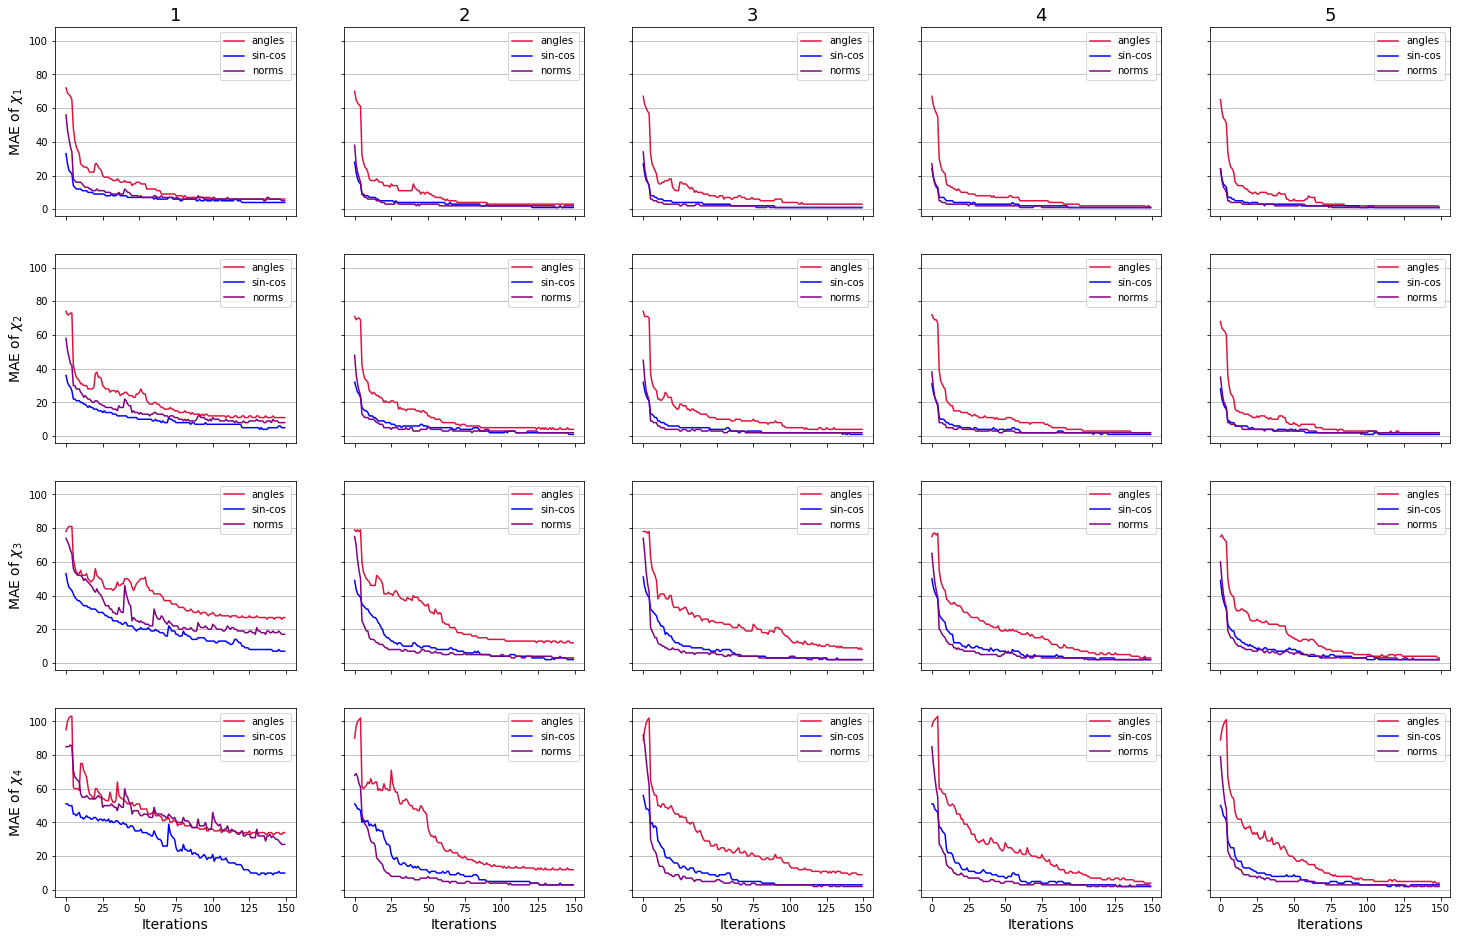

In [27]:
# plot chi angle traces

CURR_MODEL_IDS = ['1', '2', '3', '4', '5']
SPLIT = 'train'

ncols = len(CURR_MODEL_IDS)
nrows = 4
colsize = 5
rowsize = 4
fig, axs = plt.subplots(figsize=(ncols*colsize, nrows*rowsize), ncols=ncols, nrows=nrows, sharex=True, sharey=True)

chis = [f'$\\chi_{i}$' for i in range(1, 5)]

for i_col, model_id in enumerate(CURR_MODEL_IDS):
    
    for i_model, model_type in enumerate(MODEL_TYPES):
        try:
            train_mae_traces, valid_mae_traces = get_chi_angles_traces(get_model_dir(model_type, model_id))
            if SPLIT == 'train':
                mae_traces = train_mae_traces
            elif SPLIT == 'valid':
                mae_traces = valid_mae_traces
            else:
                raise ValueError(f'Invalid SPLIT: {SPLIT}')
        except FileNotFoundError as e:
            print(e)
            continue
                
        for i_chi_and_row in range(4):
            axs[i_chi_and_row][i_col].plot(np.arange(len(mae_traces[i_chi_and_row])), mae_traces[i_chi_and_row], color=MODEL_TYPE_TO_COLOR[model_type], label=model_type)
    
    # draw grids separately from the plots so we only draw them once and so they don't overlap and get darker
    # also same for legends
    for i_chi_and_row in range(4):
        axs[i_chi_and_row][i_col].grid(axis='y', color='dimgrey', alpha=0.5)
        axs[i_chi_and_row][i_col].legend()
        
        if i_chi_and_row == 0:
            axs[i_chi_and_row][i_col].set_title(model_id, fontsize=18)
        
        if i_chi_and_row == nrows - 1:
            axs[i_chi_and_row][i_col].set_xlabel('Iterations', fontsize=14)
    
        if i_col == 0:
            axs[i_chi_and_row][i_col].set_ylabel(f'MAE of $\\chi_{i_chi_and_row+1}$', fontsize=14)
    
plt.show()

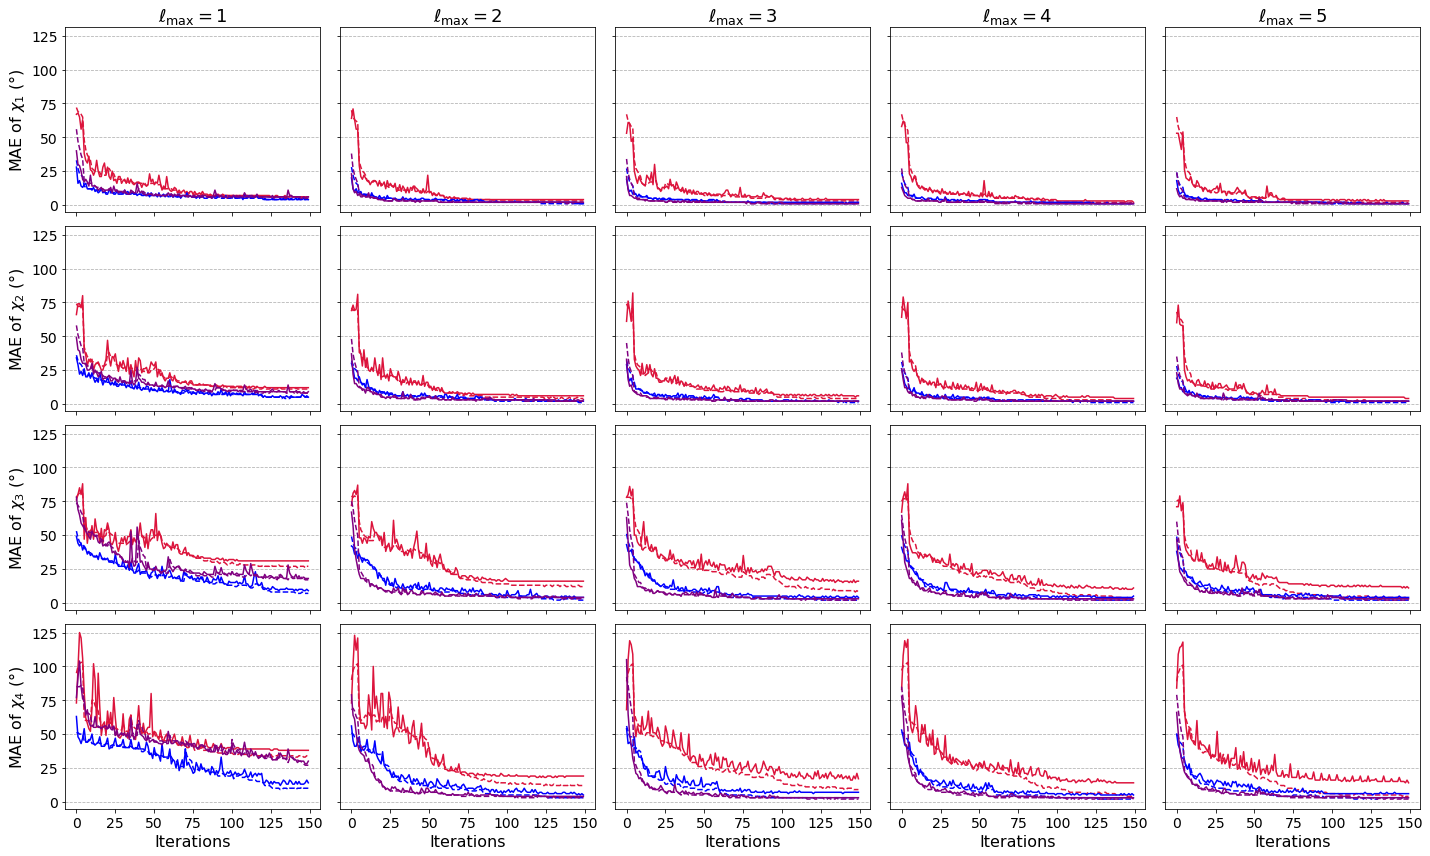

In [29]:
# plot chi angle traces, both training and validation (for SI)

CURR_MODEL_IDS = ['1', '2', '3', '4', '5']
SPLIT = 'train'

ncols = len(CURR_MODEL_IDS)
nrows = 4
colsize = 4
rowsize = 3
fig, axs = plt.subplots(figsize=(ncols*colsize, nrows*rowsize), ncols=ncols, nrows=nrows, sharex=True, sharey=True)

chis = [f'$\\chi_{i}$' for i in range(1, 5)]

for i_col, model_id in enumerate(CURR_MODEL_IDS):
    
    for i_model, model_type in enumerate(MODEL_TYPES):
        train_mae_traces, valid_mae_traces = get_chi_angles_traces(get_model_dir(model_type, model_id))
                
        for i_chi_and_row in range(4):
            axs[i_chi_and_row][i_col].plot(np.arange(len(train_mae_traces[i_chi_and_row])), train_mae_traces[i_chi_and_row], color=MODEL_TYPE_TO_COLOR[model_type], ls='--')
            axs[i_chi_and_row][i_col].plot(np.arange(len(valid_mae_traces[i_chi_and_row])), valid_mae_traces[i_chi_and_row], color=MODEL_TYPE_TO_COLOR[model_type], ls='-')
    
    # draw grids separately from the plots so we only draw them once and so they don't overlap and get darker
    # also same for legends
    for i_chi_and_row in range(4):
        axs[i_chi_and_row][i_col].grid(axis='y', color='dimgrey', ls='--', alpha=0.5)
        # axs[i_chi_and_row][i_col].legend()
        
        if i_chi_and_row == 0:
            axs[i_chi_and_row][i_col].set_title(MODEL_ID_TO_PRETTY_NAME[model_id], fontsize=18)
        
        if i_chi_and_row == nrows - 1:
            axs[i_chi_and_row][i_col].set_xlabel('Iterations', fontsize=16)
            axs[i_chi_and_row][i_col].tick_params(axis='x', labelsize=14)
    
        if i_col == 0:
            axs[i_chi_and_row][i_col].set_ylabel(f'MAE of $\\chi_{i_chi_and_row+1}$ ($\degree$)', fontsize=16)
            axs[i_chi_and_row][i_col].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig(f'plots/{task_str}__training_curves.png')
plt.savefig(f'plots/{task_str}__training_curves.pdf')
plt.show()

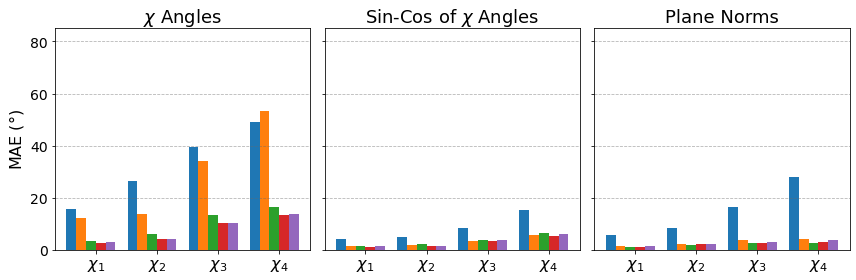

In [30]:
# plot chi angle predictions

ncols = len(MODEL_TYPES)
nrows = 1
colsize = 4
rowsize = 4
fig, axs = plt.subplots(figsize=(ncols*colsize, nrows*rowsize), ncols=ncols, nrows=nrows, sharex=True, sharey=True)

ind = np.arange(4)
chis = [f'$\\chi_{i}$' for i in range(1, 5)]
width = 0.8 / len(MODEL_IDS)

max_mae = 0
max_acc = 0

for i_col, model_type in enumerate(MODEL_TYPES):
    
    for i_model, model_id in enumerate(MODEL_IDS):
        try:
            valid_mae, valid_acc, test_mae, test_acc = get_best_chi_angle_metrics(get_model_dir(model_type, model_id))
        except FileNotFoundError as e:
            print(e)
            continue
            
        for i_chi in range(4):
            axs[i_col].bar(ind[i_chi] + i_model*width, test_mae[i_chi], width, color=MODEL_ID_TO_COLOR[model_id])
            max_mae = max(max_mae, test_mae[i_chi])
    
    # make horizontal grids
    axs[i_col].grid(axis='y', c='dimgrey', ls='--', alpha=0.5)
        
    axs[i_col].set_title(MODEL_TYPE_TO_PRETTY_NAME[model_type], fontsize=18)
    axs[i_col].set_xticks(ind + (len(MODEL_IDS)*width) / 2, chis, fontsize=16)

    axs[i_col].set_ylim([0, 85])
    
    if i_col == 0:
        axs[i_col].set_ylabel('MAE ($\degree$)', fontsize=16)
        axs[i_col].tick_params(axis='y', labelsize=14)

# # set y_lim
# for i_col in range(ncols):
#     axs[i_col].set_ylim([0, max_mae + 2])
        
plt.tight_layout()
plt.savefig(f'plots/{task_str}__test_predictions_by_model_type.png')
plt.savefig(f'plots/{task_str}__test_predictions_by_model_type.pdf')
plt.show()
        

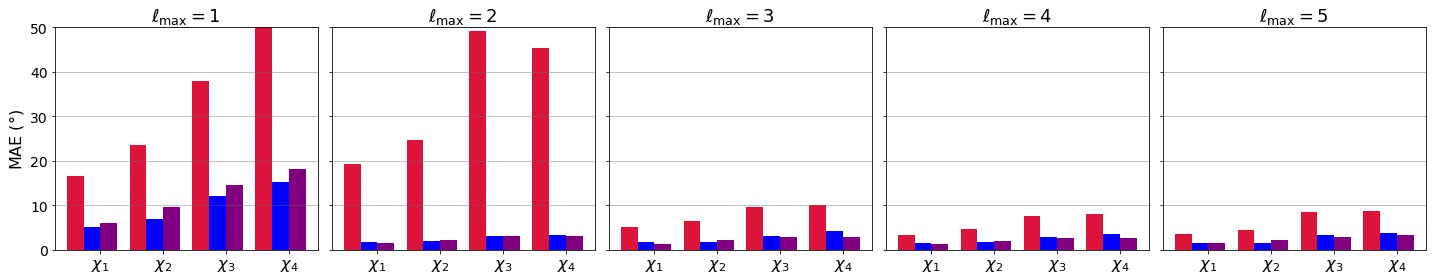

In [17]:
# plot chi angle predictions

CURR_MODEL_IDS = ['1', '2', '3', '4', '5']

ncols = len(CURR_MODEL_IDS)
nrows = 1
colsize = 4
rowsize = 4
fig, axs = plt.subplots(figsize=(ncols*colsize, nrows*rowsize), ncols=ncols, nrows=nrows, sharex=True, sharey=True)

ind = np.arange(4)
chis = [f'$\\chi_{i}$' for i in range(1, 5)]
width = 0.8 / len(MODEL_TYPES)

max_mae = 0
max_acc = 0

for i_col, model_id in enumerate(CURR_MODEL_IDS):
    
    for i_model, model_type in enumerate(MODEL_TYPES):
        try:
            valid_mae, valid_acc, test_mae, test_acc = get_best_chi_angle_metrics(get_model_dir(model_type, model_id))
        except FileNotFoundError as e:
            print(e)
            continue
            
        for i_chi in range(4):
            axs[i_col].bar(ind[i_chi] + i_model*width, test_mae[i_chi], width, color=MODEL_TYPE_TO_COLOR[model_type])
            max_mae = max(max_mae, test_mae[i_chi])
    
    # make horizontal grids
    axs[i_col].grid(axis='y', c='dimgrey', alpha=0.5)
        
    axs[i_col].set_title(MODEL_ID_TO_PRETTY_NAME[model_id], fontsize=18)
    axs[i_col].set_xticks(ind + (len(MODEL_TYPES)*width) / 2, chis, fontsize=16)

    axs[i_col].set_ylim([0, 50])
    
    if i_col == 0:
        axs[i_col].set_ylabel('MAE ($\degree$)', fontsize=16)
        axs[i_col].tick_params(axis='y', labelsize=14)

# # set y_lim
# for i_col in range(ncols):
#     axs[i_col].set_ylim([0, max_mae + 2])
        
plt.tight_layout()
plt.savefig(f'plots/{task_str}__test_predictions_by_lmax.png')
plt.savefig(f'plots/{task_str}__test_predictions_by_lmax.pdf')
plt.show()

## Error plots for side-chain packing

In [8]:
#
# Python module protein.py for holographic machine learning
#
# This module contains all structures relating to protein conventions including...
#  - dictionaries for translating amino acids to indices and vice-versa
#  - dictionaries for translating elements to indices and vice-versa
#  - dictionaries for amino acid information such as the number of atoms typically
#     associated with that amino acid in pdb structures
#


# dictionaries for converting amino acid to index and vice-versa
ind_to_aa = {0: 'GLY', 1: 'ALA', 2: 'CYS', 3: 'SER', 4: 'PRO',
             5: 'THR', 6: 'VAL', 7: 'ASP', 8: 'ILE', 9: 'LEU',
             10: 'ASN', 11: 'MET', 12: 'GLN', 13: 'LYS', 14: 'GLU',
             15: 'HIS', 16: 'PHE', 17: 'ARG', 18: 'TYR', 19: 'TRP'}
aa_to_ind = {v: k for k, v in ind_to_aa.items()}

# dictionaries to convert element to index
el_to_ind = {'C':0 , 'N':1, 'O':2, 'S':3}
ind_to_el = {0:'C', 1:'N', 2:'O', 3:'S'}
# dictionaries for amino acid statistics
atoms_per_aa = {'CYS': 6, 'ASP': 8, 'SER': 6, 'GLN': 9, 'LYS': 9,
                'ASN': 8, 'PRO': 7, 'GLY': 4, 'THR': 7, 'PHE': 11,
                'ALA': 5, 'MET': 8, 'HIS': 10, 'ILE': 8, 'LEU': 8,
                'ARG': 11, 'TRP': 14, 'VAL': 7, 'GLU': 9, 'TYR': 12}

aas = aa_to_ind.keys()
els = el_to_ind.keys()

aa_to_one_letter = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E',
                        'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
                        'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N',
                        'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER':'S',
                        'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'}
one_letter_to_aa = {v: k for v, k in aa_to_one_letter.items()}

#Mike uses this one
aa_to_ind_size = {'CYS': 2, 'ILE': 8, 'GLN': 12, 'VAL': 6, 'LYS': 13,
       'PRO': 4, 'GLY': 0, 'THR': 5, 'PHE': 16, 'GLU': 14,
       'HIS': 15, 'MET': 11, 'ASP': 7, 'LEU': 9, 'ARG': 17,
       'TRP': 19, 'ALA': 1, 'ASN': 10, 'TYR': 18, 'SER': 3}
ind_to_aa_size = {0: 'GLY', 1: 'ALA', 2: 'CYS', 3: 'SER', 4: 'PRO',
       5: 'THR', 6: 'VAL', 7: 'ASP', 8: 'ILE', 9: 'LEU',
       10: 'ASN', 11: 'MET', 12: 'GLN', 13: 'LYS', 14: 'GLU',
       15: 'HIS', 16: 'PHE', 17: 'ARG', 18: 'TYR', 19: 'TRP'}
aa_to_ind_one_letter_order = {'ALA': 0, 'CYS': 1, 'ASP': 2, 'GLU': 3,
                        'PHE': 4, 'GLY': 5, 'HIS': 6, 'ILE': 7,
                        'LYS': 8, 'LEU': 9, 'MET': 10, 'ASN': 11,
                        'PRO': 12, 'GLN': 13, 'ARG': 14, 'SER':15,
                        'THR': 16, 'VAL': 17, 'TRP': 18, 'TYR': 19}
background_freqs = {'ALA': 7.4, 'CYS': 3.3, 'ASP': 5.9, 'GLU': 3.7,
                        'PHE': 4., 'GLY': 7.4, 'HIS': 2.9, 'ILE': 3.8,
                        'LYS': 7.2, 'LEU': 7.6, 'MET': 1.8, 'ASN': 4.4,
                        'PRO': 5., 'GLN': 5.8, 'ARG': 4.2, 'SER': 8.1,
                        'THR': 6.2, 'VAL': 6.8, 'TRP': 1.3, 'TYR': 3.3}
ind_to_aa_one_letter_order = {0: 'ALA', 1: 'CYS', 2: 'ASP', 3: 'GLU',
                        4: 'PHE', 5: 'GLY', 6: 'HIS', 7: 'ILE',
                        8: 'LYS', 9: 'LEU', 10: 'MET', 11: 'ASN',
                        12: 'PRO', 13: 'GLN', 14: 'ARG', 15: 'SER', 
                        16: 'THR', 17: 'VAL', 18: 'TRP', 19: 'TYR'}
aa_to_ind_hydro = {'ALA': 8, 'ARG': 15, 'ASN': 17, 'ASP': 14,
                   'CYS': 6, 'GLN': 13, 'GLU': 10, 'GLY': 11,
                   'HIS': 18, 'ILE': 1, 'LEU': 0, 'LYS': 16,
                   'MET': 5, 'PHE': 2, 'PRO': 19, 'SER': 12,
                   'THR': 9, 'TRP': 3, 'TYR': 7, 'VAL': 4}
ind_to_aa_hydro = {8: 'ALA', 15: 'ARG', 17: 'ASN', 14: 'ASP',
                   6: 'CYS', 13: 'GLN', 10: 'GLU', 11: 'GLY',
                   18: 'HIS', 1: 'ILE', 0: 'LEU', 16: 'LYS', 
                   5: 'MET', 2: 'PHE', 19: 'PRO', 12: 'SER',
                   9: 'THR', 3: 'TRP', 7: 'TYR', 4: 'VAL'}

aa_to_one_letter = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E',
                        'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
                        'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N',
                        'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER':'S',
                        'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'}
one_letter_to_aa = {'A': 'ALA',
 'C': 'CYS',
 'D': 'ASP',
 'E': 'GLU',
 'F': 'PHE',
 'G': 'GLY',
 'H': 'HIS',
 'I': 'ILE',
 'K': 'LYS',
 'L': 'LEU',
 'M': 'MET',
 'N': 'ASN',
 'P': 'PRO',
 'Q': 'GLN',
 'R': 'ARG',
 'S': 'SER',
 'T': 'THR',
 'V': 'VAL',
 'W': 'TRP',
 'Y': 'TYR'}
aa_to_ind = {'CYS': 2, 'ILE': 8, 'GLN': 12, 'VAL': 6, 'LYS': 13,
       'PRO': 4, 'GLY': 0, 'THR': 5, 'PHE': 16, 'GLU': 14,
       'HIS': 15, 'MET': 11, 'ASP': 7, 'LEU': 9, 'ARG': 17,
       'TRP': 19, 'ALA': 1, 'ASN': 10, 'TYR': 18, 'SER': 3}
ind_to_aa = {0: 'GLY', 1: 'ALA', 2: 'CYS', 3: 'SER', 4: 'PRO',
       5: 'THR', 6: 'VAL', 7: 'ASP', 8: 'ILE', 9: 'LEU',
       10: 'ASN', 11: 'MET', 12: 'GLN', 13: 'LYS', 14: 'GLU',
       15: 'HIS', 16: 'PHE', 17: 'ARG', 18: 'TYR', 19: 'TRP'}

ind_to_ol_nisthal = {0: 'D', 1: 'E', 2: 'H', 3: 'K',
                        4: 'R', 5: 'A', 6: 'F', 7: 'I',
                        8: 'L', 9: 'M', 10: 'V', 11: 'Y',
                        12: 'N', 13: 'Q', 14: 'S', 15: 'T', 
                        16: 'G', 17: 'P',18:'C',19:'W'}
ol_to_ind_nisthal = {'D': 0,
 'E': 1,
 'H': 2,
 'K': 3,
 'R': 4,
 'A': 5,
 'F': 6,
 'I': 7,
 'L': 8,
 'M': 9,
 'V': 10,
 'Y': 11,
 'N': 12,
 'Q': 13,
 'S': 14,
 'T': 15,
 'G': 16,
 'P': 17,
 'C': 18,
 'W': 19}
ind_to_aa_ward = {0: 'GLY', 1: 'PRO', 2: 'TRP', 3: 'PHE', 4: 'TYR',

       5: 'ALA', 6: 'SER', 7: 'LYS', 8: 'ARG', 9: 'GLN',

       10: 'GLU', 11: 'MET', 12: 'HIS', 13: 'ASP', 14: 'ASN',

       15: 'CYS', 16: 'THR', 17: 'LEU', 18: 'VAL', 19: 'ILE'}
aa_to_ind_ward = {'GLY': 0,
 'PRO': 1,
 'TRP': 2,
 'PHE': 3,
 'TYR': 4,
 'ALA': 5,
 'SER': 6,
 'LYS': 7,
 'ARG': 8,
 'GLN': 9,
 'GLU': 10,
 'MET': 11,
 'HIS': 12,
 'ASP': 13,
 'ASN': 14,
 'CYS': 15,
 'THR': 16,
 'LEU': 17,
 'VAL': 18,
 'ILE': 19}
aa_to_ind_cosine = {
    'TRP' : 0 ,
    'TYR' : 1 ,
    'PHE' : 2 ,
    'LEU' : 3 ,
    'MET' : 4 ,
    'ARG' : 5 ,
    'LYS' : 6 ,
    'HIS' : 7 ,
    'GLN' : 8 ,
    'GLU' : 9 ,
    'ASP' : 10 ,
    'ASN' : 11 ,
    'ALA' : 12 ,
    'SER' : 13 ,
    'THR' : 14 ,
    'CYS' : 15 ,
    'ILE' : 16 ,
    'VAL' : 17 ,
    'PRO' : 18 ,
    'GLY' : 19 ,
}
ind_to_aa_cosine = {
    0 : 'TRP' ,
    1 : 'TYR' ,
    2 : 'PHE' ,
    3 : 'LEU' ,
    4 : 'MET' ,
    5 : 'ARG' ,
    6 : 'LYS' ,
    7 : 'HIS' ,
    8 : 'GLN' ,
    9 : 'GLU' ,
    10 : 'ASP' ,
    11 : 'ASN' ,
    12 : 'ALA' ,
    13 : 'SER' ,
    14 : 'THR' ,
    15 : 'CYS' ,
    16 : 'ILE' ,
    17 : 'VAL' ,
    18 : 'PRO' ,
    19 : 'GLY' ,
}

background_freqs = {'ALA': 7.4, 'CYS': 3.3, 'ASP': 5.9, 'GLU': 3.7,
                    'PHE': 4., 'GLY': 7.4, 'HIS': 2.9, 'ILE': 3.8,
                    'LYS': 7.2, 'LEU': 7.6, 'MET': 1.8, 'ASN': 4.4,
                    'PRO': 5., 'GLN': 5.8, 'ARG': 4.2, 'SER': 8.1,
                    'THR': 6.2, 'VAL': 6.8, 'TRP': 1.3, 'TYR': 3.3}



#for real one
ind_to_aa_for_real_one_letter = dict()
for i,aa in enumerate(ind_to_aa.values()):
    ind_to_aa_for_real_one_letter[i] = aa_to_one_letter[aa]
ind_to_ol_size = {x:aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)}
ol_to_ind_size = {val:key for key,val in ind_to_ol_size.items()}


In [14]:
import os
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt

with gzip.open('CASP13__error_per_aa_all.pkl.gz', 'rb') as f:
    casp13_errors = pickle.load(f)

with gzip.open('CASP14__error_per_aa_all.pkl.gz', 'rb') as f:
    casp14_errors = pickle.load(f)


In [15]:

def plot_errors(errors, identitfier_str, plots_dir):

    chi_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

    aas = list(errors.keys())

    for i_split, aas_split in enumerate([aas[:9], aas[9:]]):

        ncols = 4
        nrows = 9
        colsize = 3
        rowsize = 2
        fig, axs = plt.subplots(figsize=(colsize*ncols, rowsize*nrows), ncols=ncols, nrows=nrows, sharex=False, sharey=True)

        for i_row, aa_ind in enumerate(aas_split):
            for i_col in range(4):
                chi = i_col + 1
                ax = axs[i_row, i_col]
                aa = one_letter_to_aa[ind_to_ol_size[aa_ind]]

                if i_row == 0:
                    ax.set_title(f'$\\chi_{chi}$', fontsize=18)

                if i_row == len(aas_split) - 1:
                    ax.set_xlabel('Angle MAE $\\degree$', fontsize=18)

                if i_col == 0:
                    ax.set_ylabel(f'{aa}', fontsize=18)

        #         ax.tick_params(axis='y', labelsize=14)
                ax.set_yticklabels([])


                error_distribution = errors[aa_ind][:, i_col]
                error_distribution = error_distribution[~np.isnan(error_distribution)]
                if len(error_distribution) == 0: # all NaNs!
                    if i_row == len(aas_split) - 1:
                        ax.set_xlim([-5, 185])
                        ax.set_xticks([0, 45, 90, 135, 180])
                        ax.tick_params(axis='x', labelsize=16)
                    else:
                        ax.set_xticks([])
                    ax.set_yticks([])
                    continue

                mean = np.mean(error_distribution)
                median = np.median(error_distribution)
                
                ax.hist(error_distribution, color=chi_colors[i_col], density=True)
                ax.axvline(mean, color='black', label=f'Mean: %.2f' % (mean))
    #             ax.axvline(median, color='red', label=f'Median: %.2f' % (median))
                ax.legend(loc='upper right', fontsize=12)
                
                ax.grid(axis='x', ls='--', color='dimgrey', alpha=0.5)
                
                if i_row == len(aas_split) - 1:
                    ax.set_xlim([-5, 185])
                    ax.set_xticks([0, 45, 90, 135, 180])
                    ax.tick_params(axis='x', labelsize=16)
                else:
                    ax.set_xticklabels([])


        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f'{identitfier_str}_error_per_aa__split={i_split}.pdf'))
        plt.show()

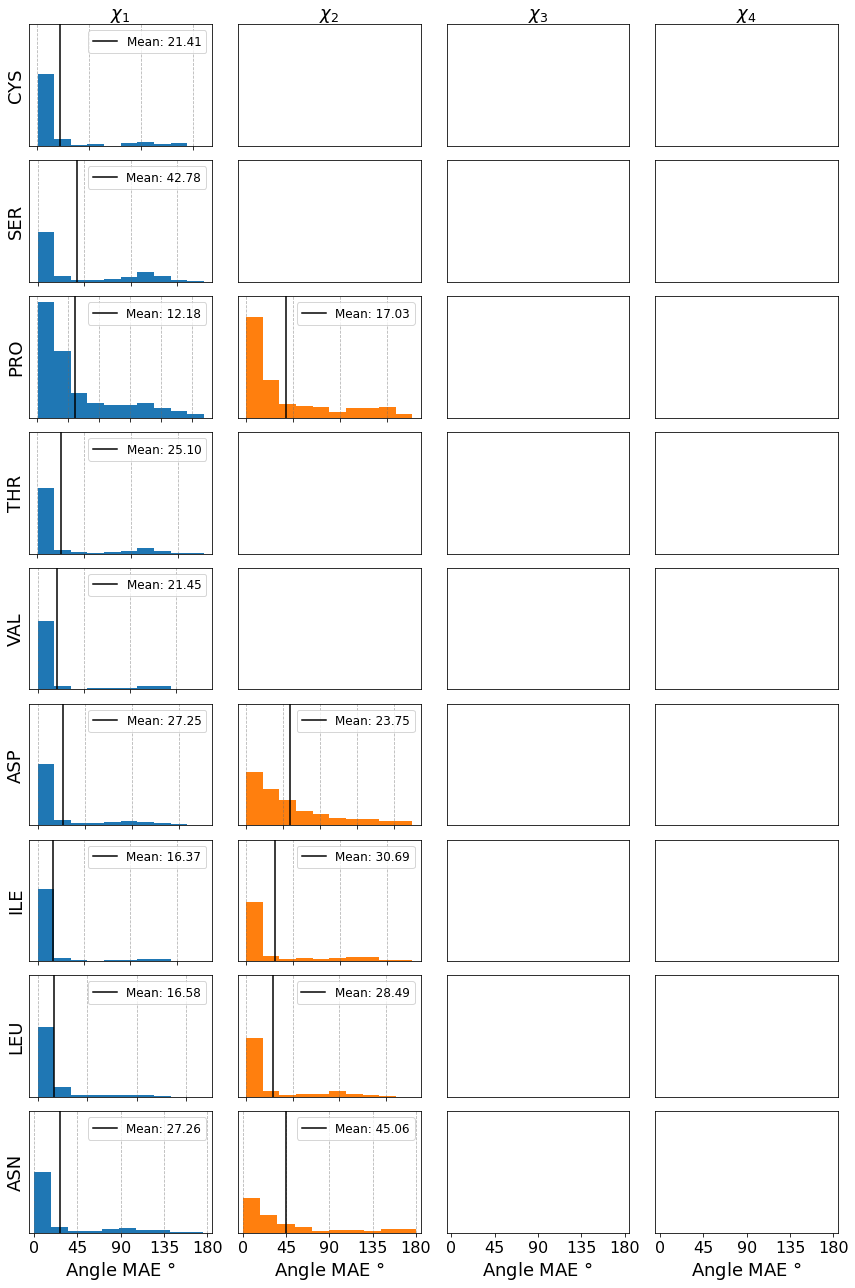

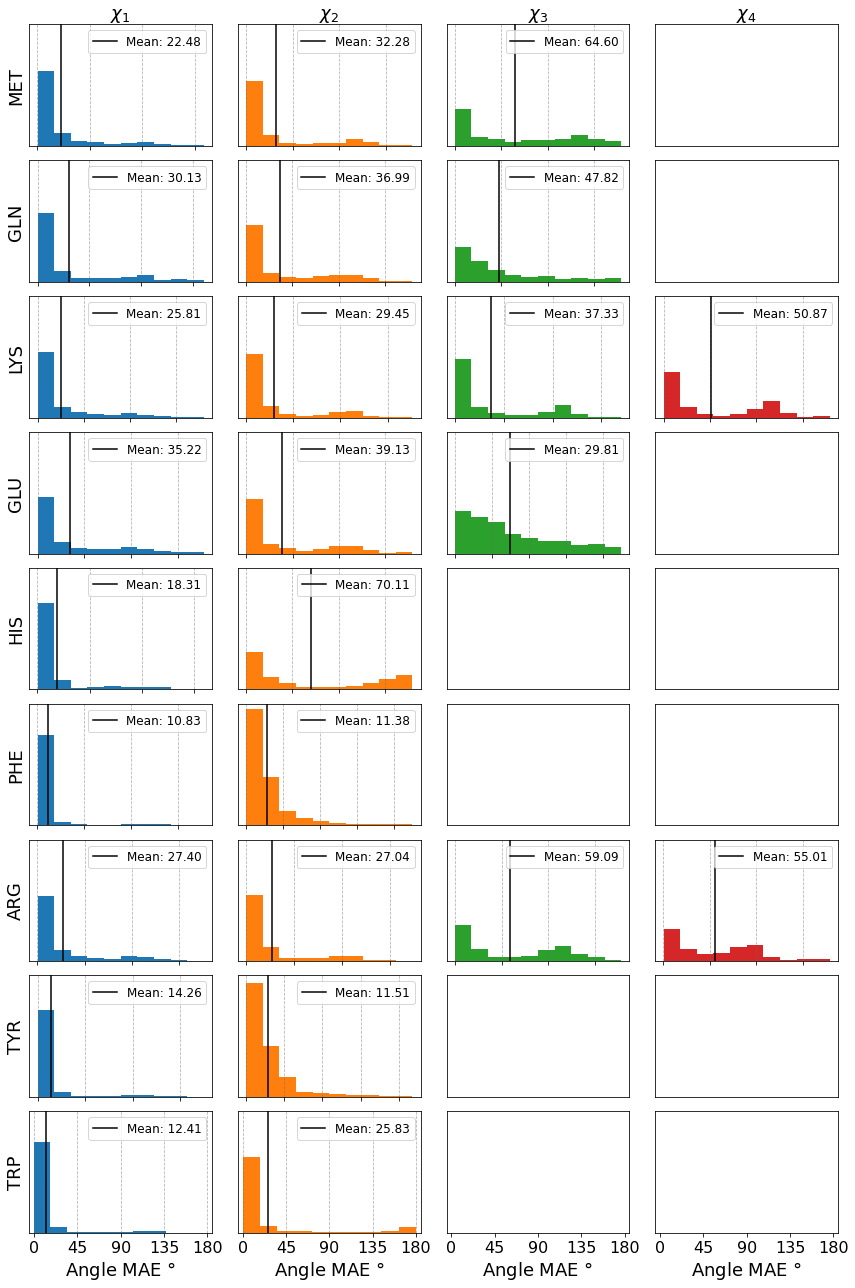

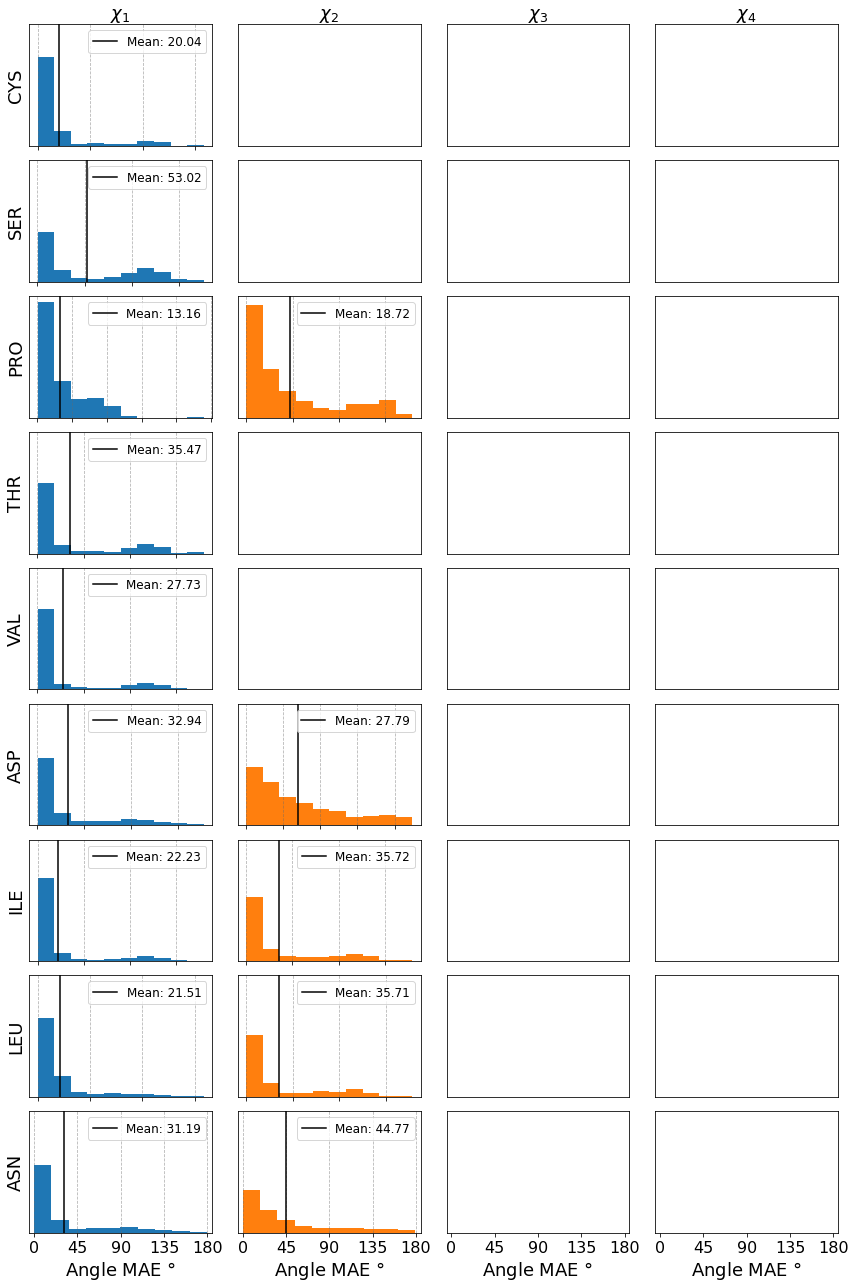

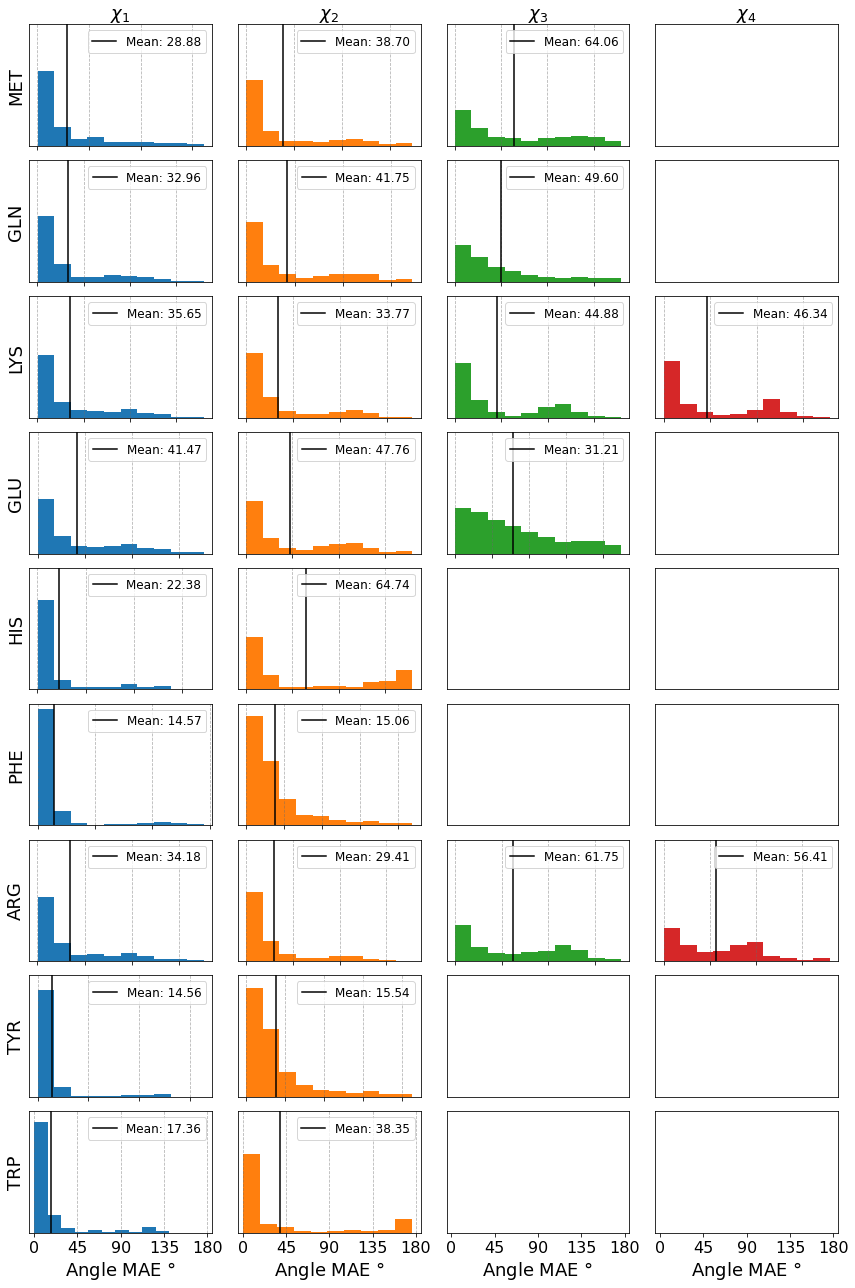

In [17]:
plots_dir = 'plots'
plot_errors(casp13_errors, 'CASP13', plots_dir)
plot_errors(casp14_errors, 'CASP14', plots_dir)